In [1]:
# Build the linear regression model using scikit learn in boston data to predict 'Price'
# based on other dependent variable.


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Read the column names from Boston Object and assign to bos Data frame as it does not have any Labels
bos.columns = boston.feature_names

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Read the Price from the Boston Data set and add to the current bos Object
bos['PRICE'] = boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Import the Linear Regression Object and the Cross Validation Object
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Create X with all the Features except for the Price Column
X = bos.drop('PRICE',axis=1)

In [10]:
lm = LinearRegression()

In [11]:
# Create the Test and Train Data Set
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state=5)

In [12]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Predict the Value 
pred_test = lm.predict(X_test)

In [14]:
# Calculate the Root MeanSquare Error between Predicted value and Actual Results of Y Test
np.mean((Y_test - pred_test)**2)

28.54136727561835

Text(0,0.5,'Predicted Y')

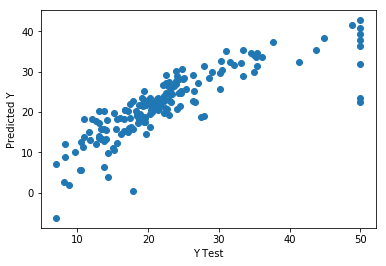

In [15]:
plt.scatter(Y_test,pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
from sklearn import metrics
# Print the Key Metrics / Coefficients From the Model

print('MAE:', metrics.mean_absolute_error(Y_test, pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, pred_test)))

pd.DataFrame({'Features':X.columns, 'Coefficient':lm.coef_})


MAE: 3.4620105168135544
MSE: 28.541367275618335
RMSE: 5.342412121468947


,Features,Coefficient
0,CRIM,-0.156381
1,ZN,0.038549
2,INDUS,-0.025063
3,CHAS,0.786440
4,NOX,-12.946912
5,RM,4.002689
6,AGE,-0.011602
7,DIS,-1.368288
8,RAD,0.341757
9,TAX,-0.013515


In [17]:
print('From Above stats RM has high Coefficient and signifies the impact on the price ')

From Above stats RM has high Coefficient and signifies the impact on the price 
